<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''
SELECT 
    count(*)
FROM
    vacancies
'''

In [5]:
# результат запроса
df3_1 = pd.read_sql_query(query_3_1, connection)
df3_1 
#кодичество вакансий в нашей БД - 49197

,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''
SELECT 
    count(*)
FROM
    employers
'''

In [7]:
# результат запроса
df3_2 = pd.read_sql_query(query_3_2, connection)
df3_2 
#количество работодателей - 23501

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''
SELECT 
    count(*)
FROM
    areas
'''

In [9]:
# результат запроса
df3_3 = pd.read_sql_query(query_3_3, connection)
df3_3
# Количество регионов - 1362

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4 = f'''
SELECT 
    count(*)
FROM
    industries
'''

In [11]:
# результат запроса
df3_4 = pd.read_sql_query(query_3_4, connection)
df3_4
#Количество сфер дефтельности - 294

,count
0,294


***

In [12]:
# выводы по предварительному анализу данных
# Получены объемы данных в основных таблицах схемы

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [13]:
# текст запроса
query_4_1 = f'''
SELECT 
    a.name area,
    count(v.id) cnt
FROM
    vacancies v
JOIN areas a on a.id = v.area_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5
'''

In [14]:
# результат запроса
df4_1 = pd.read_sql_query(query_4_1, connection)
df4_1


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [15]:
# текст запроса
query_4_2 = f'''
SELECT 
    count(*) cnt
FROM
    vacancies 
WHERE salary_from IS NOT null or salary_to IS NOT null
'''

In [16]:
# результат запроса
df4_2 = pd.read_sql_query(query_4_2, connection)
df4_2

,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [17]:
# текст запроса
query_4_3 = f'''
(SELECT 
    ROUND(AVG(salary_from),0),  'average mean from' as averege
FROM
    vacancies)
UNION ALL 
(SELECT 
    ROUND(AVG(salary_to),0),  'average mean to' 
FROM
    vacancies)
'''

In [18]:
# результат запроса
df4_3 = pd.read_sql_query(query_4_3, connection)
df4_3

,round,averege
0,71065.0,average mean from
1,110537.0,average mean to


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [19]:
# текст запроса
query_4_4 = f'''
SELECT 
    count(id) cnt,
    schedule,
    employment
FROM
    vacancies 
GROUP BY schedule, employment
ORDER BY 1 DESC
LIMIT 5
'''

In [20]:
# результат запроса
df4_4 = pd.read_sql_query(query_4_4, connection)
df4_4

,cnt,schedule,employment
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [21]:
# текст запроса
query_4_5 = f'''
SELECT    
    experience as "Требуемый опыт работы",
    count(*) cnt
FROM
    vacancies 
GROUP BY 1
ORDER BY 2 
'''

In [22]:
# результат запроса
df4_5 = pd.read_sql_query(query_4_5, connection)
df4_5

,Требуемый опыт работы,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

In [23]:
# выводы по детальному анализу вакансий
# Были выполнены запросы позволяющие оценить основные харакетристики таблоицы вакансий.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [24]:
# текст запроса
query_5_1 = f'''
(SELECT 
    e.name,
    count(*)
FROM
    employers e
JOIN 
    vacancies v on v.employer_id = e.id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 1)
UNION ALL
(SELECT 
    e.name,
    count(*)
FROM
    employers e
JOIN 
    vacancies v on v.employer_id = e.id
GROUP BY 1
ORDER BY 2 DESC
OFFSET 4 LIMIT 1)
'''


In [25]:
# результат запроса
df5_1 = pd.read_sql_query(query_5_1, connection)
df5_1

,name,count
0,Яндекс,1933
1,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [26]:
# текст запроса
query_5_2 = f'''
SELECT 
   a.name,
   count(v.id) as "Количество вакансий",
   count(e.id) as "Количество работодателей" 
FROM
    areas a
LEFT JOIN 
   vacancies v on v.area_id = a.id
LEFT JOIN 
    employers e ON a.id = e.area
GROUP BY a.name 
HAVING count(v.id) = 0 
ORDER BY 3 DESC'''

In [27]:
# результат запроса
df5_2 = pd.read_sql_query(query_5_2, connection)
df5_2

,name,Количество вакансий,Количество работодателей
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Ростовская область,0,18
...,...,...,...
588,Струнино,0,0
589,Славгород (Алтайский край),0,0
590,Сорочинск,0,0
591,Ленинский (Тульская область),0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [28]:
# текст запроса
query_5_3 = f'''
SELECT 
    e.name,
    count(distinct v.area_id)
FROM 
    vacancies v
LEFT JOIN
    employers e ON e.id = v.employer_id
GROUP BY e.name 
ORDER BY 2 DESC'''

In [29]:
df5_3 = pd.read_sql_query(query_5_3, connection)
df5_3# результат запроса

,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [30]:
# текст запроса
query_5_4 = f'''
SELECT 
    count(e.name)
FROM 
    employers e
LEFT JOIN
    EMPLOYERS_INDUSTRIES ei on e.id = ei.employer_id
LEFT JOIN 
    INDUSTRIES i on i.id = ei.industry_id
WHERE ei.industry_id is NULL
ORDER BY 1 DESC'''

In [31]:
# результат запроса
df5_4 = pd.read_sql_query(query_5_4, connection)
df5_4

,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [32]:
# текст запроса
query_5_5 = f'''
SELECT 
    e.name,
    count(ei.industry_id)   
FROM 
    employers e
LEFT JOIN
    EMPLOYERS_INDUSTRIES ei on e.id = ei.employer_id
LEFT JOIN 
    INDUSTRIES i on i.id = ei.industry_id
GROUP BY e.name
HAVING count(ei.industry_id) = 4
ORDER BY 1 
OFFSET 2 LIMIT 1'''

In [33]:
# результат запроса
df5_5 = pd.read_sql_query(query_5_5, connection)
df5_5

,name,count
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [34]:
# текст запроса
query_5_6 = f'''
SELECT 
    i.name,
    count(e.name)
FROM 
    employers e
LEFT JOIN
    EMPLOYERS_INDUSTRIES ei on e.id = ei.employer_id
LEFT JOIN 
    INDUSTRIES i on i.id = ei.industry_id
GROUP BY 1
HAVING i.name = 'Разработка программного обеспечения'
'''

In [35]:
# результат запроса
df5_6 = pd.read_sql_query(query_5_6, connection)
df5_6

,name,count
0,Разработка программного обеспечения,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [36]:
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8' # Определяем адрес страницы
response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер

In [37]:

links = page.find('table', class_='standard sortable').find('tbody').find_all('a') # Ищем все ссылки на странице и сохраняем в переменной links в виде списка
print(len(links))

21


In [38]:
print([link.text for link in links]) #выведем список ссылок. видим, что есть ненужные
cities = [link.text for link in links]


['переписи 2021 года', '[5]', 'переписи 2010 года', '[6]', 'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', '[a]', 'Пермь', 'Волгоград']


In [39]:
mask = ['1','2','3','4','5','6','7','8','9','0', ']','[']
drop_cities = []
for city in cities:
    for i in list(city):
        if i in mask:
            drop_cities.append(city)
drop_cities=set(drop_cities)
print(list(drop_cities))  

#создали список ненужных городов

['переписи 2010 года', '[a]', '[6]', '[5]', 'переписи 2021 года']


In [40]:
new_city = []
for city in cities:
    if city not in drop_cities:
        new_city.append(city)
sql_city=tuple(new_city)
print(sql_city)
#из всех городов взяли только те, которые не встречаются в списке ненужных и сделали из него кортеж

('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')


In [41]:
# текст запроса
query_5_7 = f'''
(SELECT 
    a.name,
    count(v.id) cnt
FROM 
    vacancies v
LEFT JOIN
    areas a on v.area_id = a.id
LEFT JOIN 
    employers e on v.employer_id = e.id
WHERE e.name = 'Яндекс' and a.name in {sql_city}
GROUP BY 1
ORDER BY 2) 
UNION 
(SELECT 
    'total', count(v.id) cnt
FROM 
    vacancies v
LEFT JOIN
    areas a on v.area_id = a.id
LEFT JOIN 
    employers e on v.employer_id = e.id
WHERE e.name = 'Яндекс' and a.name in {sql_city}
)
ORDER BY 2
    

'''

In [42]:
# результат запроса
df5_7 = pd.read_sql_query(query_5_7, connection)
df5_7

,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

In [43]:
# выводы по анализу работодателей
#Были выполнены запросы, для анализа работодателей. Преобретены навыки работы с внешними истониками данных 

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [44]:
# текст запроса
query_6_1 = f'''
SELECT 
    count(*) cnt
FROM
    vacancies 
WHERE lower(name) LIKE '%data%' or lower(name) LIKE '%данн%'
'''

In [45]:
# результат запроса
df6_1 = pd.read_sql_query(query_6_1, connection)
df6_1

,cnt
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [46]:
# текст запроса
query_6_2 = f'''
SELECT 
    -- name, experience, employment
    count (*)
FROM
    vacancies 
WHERE (lower(name) LIKE '%data scientist%' or 
       lower(name) LIKE '%data science%' or 
       lower(name) LIKE '%исследователь данных%' or 
      (name LIKE '%ML%' and name NOT LIKE '%HTML%') or 
       lower(name) LIKE '%machine learning%' or 
       lower(name) LIKE '%машинн%обучен%%') and
      (lower(name) LIKE '%junior%' or 
       experience = 'Нет опыта' or 
       employment = 'Cтажировка')
'''

In [47]:
# результат запроса
df6_2 = pd.read_sql_query(query_6_2, connection)
df6_2

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [48]:
# текст запроса
query_6_3 = f'''
SELECT 
    -- name, experience, employment
    count (*)
FROM
    vacancies 
WHERE (lower(name) LIKE '%data scientist%' or 
       lower(name) LIKE '%data science%' or 
       lower(name) LIKE '%исследователь данных%' or 
      (name LIKE '%ML%' and name NOT LIKE '%HTML%') or 
       lower(name) LIKE '%machine learning%' or 
       lower(name) LIKE '%машинн%обучен%%') and
       (key_skills LIKE '%SQL%' or key_skills LIKE '%postgres%')
'''

In [49]:
# результат запроса
df6_3 = pd.read_sql_query(query_6_3, connection)
df6_3

,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [50]:
# текст запроса
query_6_4 = f'''
SELECT 
    -- name, experience, employment
    count (*)
FROM
    vacancies 
WHERE (lower(name) LIKE '%data scientist%' or 
       lower(name) LIKE '%data science%' or 
       lower(name) LIKE '%исследователь данных%' or 
      (name LIKE '%ML%' and name NOT LIKE '%HTML%') or 
       lower(name) LIKE '%machine learning%' or 
       lower(name) LIKE '%машинн%обучен%%') and
       (lower(key_skills) LIKE '%python%')
'''

In [51]:
# результат запроса
df6_4 = pd.read_sql_query(query_6_4, connection)
df6_4

,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [52]:
# текст запроса
query_6_5 = f'''
SELECT 
    name, experience, employment, key_skills
FROM
    vacancies 
WHERE (lower(name) LIKE '%data scientist%' or 
       lower(name) LIKE '%data science%' or 
       lower(name) LIKE '%исследователь данных%' or 
      (name LIKE '%ML%' and name NOT LIKE '%HTML%') or 
       lower(name) LIKE '%machine learning%' or 
       lower(name) LIKE '%машинн%обучен%%') 
'''

In [53]:
df6_5 = pd.read_sql_query(query_6_5, connection)
def skills_count (skills_string):
    if skills_string is None:
        return None
    else:
        sk_str = skills_string.split('\t')
        return len(sk_str)
df6_5['skill_slpitted'] = df6_5['key_skills'].apply(skills_count)
df6_5['skill_slpitted'].mean()
#df6_5


6.406032482598608

In [54]:
# текст запроса
query_6_5_v2 = f'''
SELECT 
    --name, experience, employment, 
    AVG(LENGTH(key_skills) - LENGTH(replace(key_skills,'\t','')) +1)
FROM
    vacancies 
WHERE (lower(name) LIKE '%data scientist%' or 
       lower(name) LIKE '%data science%' or 
       lower(name) LIKE '%исследователь данных%' or 
      (name LIKE '%ML%' and name NOT LIKE '%HTML%') or 
       lower(name) LIKE '%machine learning%' or 
       lower(name) LIKE '%машинн%обучен%%') 
'''

In [55]:
df6_5_v2 = pd.read_sql_query(query_6_5_v2, connection)
df6_5_v2

,avg
0,6.406032


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [56]:
# текст запроса
query_6_6 = f'''
SELECT 
    experience,
    AVG(coalesce((salary_to+salary_from)/2, salary_to, salary_from))
FROM
    vacancies 
WHERE (lower(name) LIKE '%data scientist%' or 
       lower(name) LIKE '%data science%' or 
       lower(name) LIKE '%исследователь данных%' or 
      (name LIKE '%ML%' and name NOT LIKE '%HTML%') or 
       lower(name) LIKE '%machine learning%' or 
       lower(name) LIKE '%машинн%обучен%%') 
and (salary_to is not NULL or salary_from is not NULL )
GROUP BY 1
'''

In [57]:
df6_6 = pd.read_sql_query(query_6_6, connection)
df6_6

,experience,avg
0,Нет опыта,74642.857143
1,От 1 года до 3 лет,139674.750000
2,От 3 до 6 лет,243114.666667


***

In [58]:
# выводы по предметному анализу
#Был проведен предметный анализ вакансий имеющих отношение к Data Science. Было выяснено количество вакансий, ключевые навыки требуемые от работатдателей, их количество, 
# средняя зарплата по опыту.

# Общий вывод по проекту

In [59]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

# Выводы
### Была выполнена работа по анализу вакансий с hh.ru. В процессе выполенняи раблоты были применены полученые ранее знанеия в области формирования SQL запросов. Были изучены таблицы схемы, получены разные харакетристики данных. Для большей информативности исследований считаю стоит применять визиуализацию данных. Напрмиер для оценки колличества вакансий по решионам из задания 4.1 визуализация позволить быстрее разобраться в полученных данных. Визуализируем их:   

In [60]:
import plotly
import plotly.express as px

In [61]:
bar_data = df4_1
fig=px.pie(
    data_frame=bar_data,
    values = 'cnt',
    names = 'area',
    title='Распределение вакансий по городам',
    color = 'area',
    width=500,
    height=500
)
fig.show()


### из полученного пирога видно, что вакансии из Москвы и Санкт-Петербурга занимают больше половины от всех представленных вакансий

### Было интересно узнать среднюю зарплату DS в представленных городах и так же визуализировать 

In [62]:
# текст запроса
query_dop = f'''
SELECT 
    a.name,
    AVG(coalesce((v.salary_to+v.salary_from)/2, v.salary_to, v.salary_from))
FROM
    vacancies v
JOIN areas a ON v.area_id = a.id 
WHERE (lower(v.name) LIKE '%data scientist%' or 
       lower(v.name) LIKE '%data science%' or 
       lower(v.name) LIKE '%исследователь данных%' or 
      (v.name LIKE '%ML%' and v.name NOT LIKE '%HTML%') or 
       lower(v.name) LIKE '%machine learning%' or 
       lower(v.name) LIKE '%машинн%обучен%%') 
and (v.salary_to is not NULL or v.salary_from is not NULL )
GROUP BY 1
'''

In [63]:
dfdop = pd.read_sql_query(query_dop, connection)
dfdop

,name,avg
0,Алматы,94586.500000
1,Армения,268862.666667
2,Барнаул,60000.000000
3,Белгород,200000.000000
4,Владивосток,85000.000000
5,Екатеринбург,124000.000000
6,Казань,50000.000000
7,Кипр,300000.000000
8,Королев,130000.000000
9,Москва,207629.629630


In [64]:
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns

Text(0, 0.5, 'Средняя зарплата')

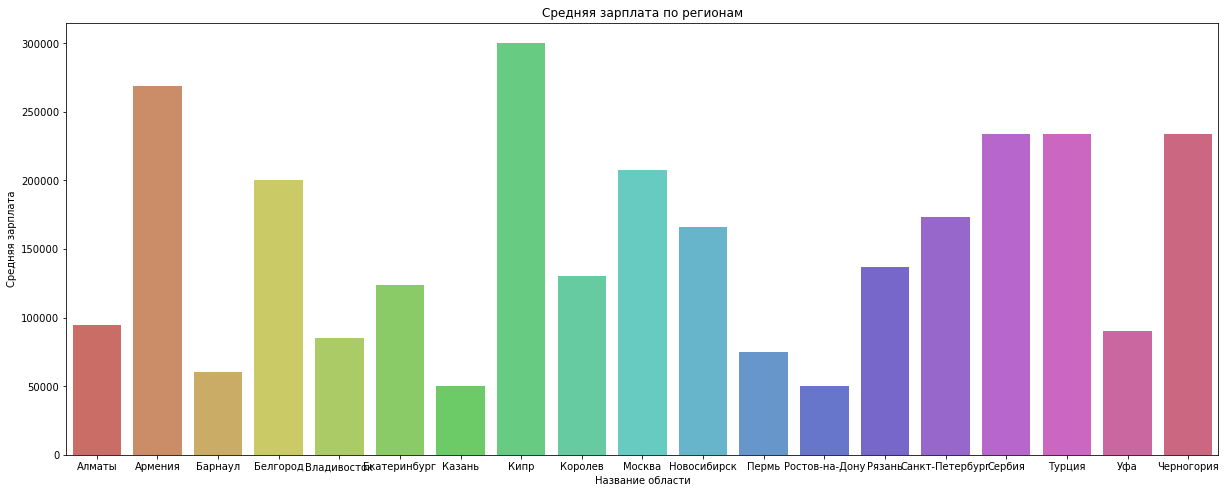

In [65]:

fig = plt.figure(figsize=(16, 6))
axes = fig.add_axes([0, 0, 1, 1])

barplot = sns.barplot(
    data=dfdop,
    x='name',
    y='avg',
    #estimator = len,
    palette='hls',
    
)
barplot.set_title('Средняя зарплата по регионам');
axes.set_xlabel('Название области')
axes.set_ylabel('Средняя зарплата')

### Из полученного графика видно, что среди регионов есть как города, так и страны. Исследования зависимостей средней ЗП по категориям стран и городов моджет быть целью дальнейших исследований.  

In [66]:
connection.close()